In [83]:
import numpy as np
import pandas as pd
from sklearn import datasets
#from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

#users = pd.read_csv('u(1).user.csv', header = None)
#movies =pd.read_csv("u.item.csv", header = None, encoding = 'latin-1')
#ratings = pd.read_csv("u(1).data.csv",sep=',' , header =None, names = ['userid', 'movieid', 'rating', 'time'])

air_pollution=pd.read_csv('airQualityData.csv')
air_pollution

,Unnamed: 0,date,cityname,citycode,SO2,NO2,PM10,CO,O3_8,PM25,...,airPressure,sunHours,highTemperature,lowHumidity,year,month,season,longitude,latitude,day
0,0,4/1/2017,city1,110000,7,52,78,0.6,86,31,...,1012.80,11.4,22.2,13,2017,4,2,116.407526,39.904030,1
1,1,4/2/2017,city1,110000,14,72,112,1.1,96,68,...,1014.15,10.4,23.1,14,2017,4,2,116.407526,39.904030,2
2,2,4/3/2017,city1,110000,21,78,170,1.2,158,125,...,1013.38,10.2,25.5,19,2017,4,2,116.407526,39.904030,3
3,3,4/4/2017,city1,110000,20,62,147,1.1,100,130,...,1011.10,0.0,20.2,32,2017,4,2,116.407526,39.904030,4
4,4,4/5/2017,city1,110000,5,30,57,0.6,132,61,...,1008.88,5.6,20.0,45,2017,4,2,116.407526,39.904030,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71143,71143,7/27/2020,city108,611000,9,12,42,0.4,105,14,...,920.80,11.5,35.2,33,2020,7,3,109.940477,33.870422,27
71144,71144,7/28/2020,city108,611000,11,16,40,0.6,82,18,...,923.40,10.0,30.5,48,2020,7,3,109.940477,33.870422,28
71145,71145,7/29/2020,city108,611000,12,16,39,0.6,99,22,...,924.90,11.6,31.3,51,2020,7,3,109.940477,33.870422,29
71146,71146,7/30/2020,city108,611000,12,16,40,0.6,100,22,...,926.10,10.2,30.0,47,2020,7,3,109.940477,33.870422,30


In [84]:
air_pollution["SO2"]=air_pollution["SO2"].fillna(air_pollution["SO2"].mean())
air_pollution["PM10"]=air_pollution["PM10"].fillna(air_pollution["PM10"].mode())
air_pollution["CO"]=air_pollution["CO"].fillna(air_pollution["CO"].mode())
air_pollution["O3_8"]=air_pollution["O3_8"].fillna(air_pollution["O3_8"].mode())

In [85]:
air_pollution_new1=air_pollution.drop(['PM25','station','airPressure','sunHours','highTemperature','lowHumidity','year','month','season','longitude','day','latitude','date','latitude','NO2','cityname'], axis=1)



In [86]:
air_pollution_new1=air_pollution_new1.drop(air_pollution_new1.columns[[0]],axis=1)

In [87]:
air_pollution_new1

,citycode,SO2,PM10,CO,O3_8
0,110000,7,78,0.6,86
1,110000,14,112,1.1,96
2,110000,21,170,1.2,158
3,110000,20,147,1.1,100
4,110000,5,57,0.6,132
...,...,...,...,...,...
71143,611000,9,42,0.4,105
71144,611000,11,40,0.6,82
71145,611000,12,39,0.6,99
71146,611000,12,40,0.6,100


In [88]:
air_pollution['PM25C1'] = air_pollution['PM25'].apply(lambda x: 1 if x > 50 else -1)
air_pollution_c1=air_pollution['PM25C1']
air_pollution['PM25C2'] = air_pollution['PM25'].apply(lambda x: 1 if x > 100 else -1)
air_pollution_c2=air_pollution['PM25C2']
air_pollution['PM25C3'] = air_pollution['PM25'].apply(lambda x: 1 if x > 150 else -1)
air_pollution_c3=air_pollution['PM25C3']
air_pollution['PM25C4'] = air_pollution['PM25'].apply(lambda x: 1 if x > 200 else -1)
air_pollution_c4=air_pollution['PM25C4']
air_pollution['PM25C5'] = air_pollution['PM25'].apply(lambda x: 1 if x > 250 else -1)
air_pollution_c5=air_pollution['PM25C5']


In [89]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(air_pollution_new1, air_pollution['PM25C1'], test_size=0.20, random_state=42)
#fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)



In [90]:

from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
from sklearn import datasets, metrics, model_selection, svm
#RF=RandomForestRegressor(random_state=42, n_estimators=100, max_depth=20) #I need to know what n estimators mean
grad1=GradientBoostingClassifier(random_state=0)
grad1.fit(X1_train,y1_train)

GradientBoostingClassifier(random_state=0)

In [91]:
grad1.score(X1_test,y1_test)


0.9153900210822207

In [92]:
#RF_pred = rf1.predict(X_train)
grad1_pred_test = grad1.predict(X1_test)
#r3 = mean_absolute_error(y_train, y_pred)
MAE_grad1= mean_absolute_error(y1_test, grad1_pred_test)
#print(“MAE of Random Forest Regressor on training set: {:.3f}”.format(r3))
print("MAE of Gradient Boosting Tree : {:.4f}".format(MAE_grad1))

MAE of Gradient Boosting Tree : 0.1692


In [93]:
import math
meanSquaredError_grad1=mean_squared_error(y1_test, grad1_pred_test)
print("MSE:", meanSquaredError_grad1)
rootMeanSquaredError_grad1 = math.sqrt(meanSquaredError_grad1)
print("RMSE:", rootMeanSquaredError_grad1)

MSE: 0.33843991567111736
RMSE: 0.581755890104361


/Users/wkuuser/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


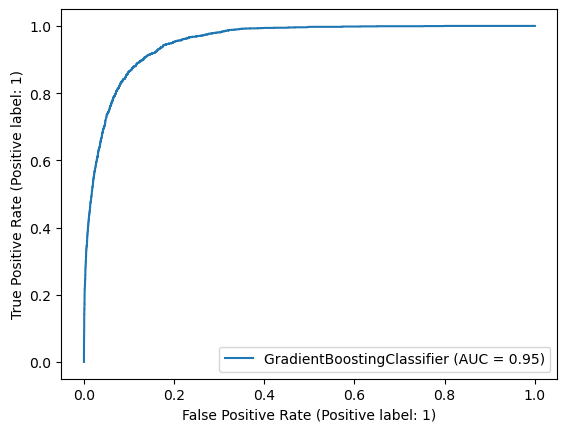

In [94]:
p1=plot_roc_curve(grad1,X1_test, y1_test)

In [113]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(air_pollution_new1, air_pollution['PM25C2'], test_size=0.20, random_state=42)




In [114]:
grad2=GradientBoostingClassifier(random_state=0)
grad2.fit(X2_train,y2_train)

GradientBoostingClassifier(random_state=0)

In [115]:
grad2.score(X2_test,y2_test)

0.9942375263527758

/Users/wkuuser/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


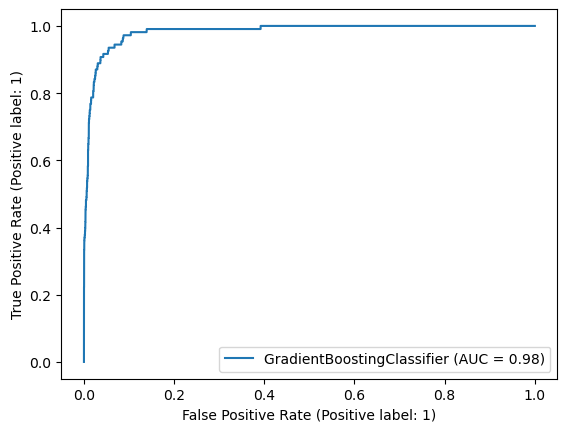

In [116]:
p2=plot_roc_curve(grad2,X2_test, y2_test)

In [117]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(air_pollution_new1, air_pollution['PM25C3'], test_size=0.20, random_state=42)




In [118]:
grad3=GradientBoostingClassifier(random_state=0)
grad3.fit(X3_train,y3_train)

GradientBoostingClassifier(random_state=0)

In [119]:
grad3.score(X3_test,y3_test)

0.9990864371047083

/Users/wkuuser/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


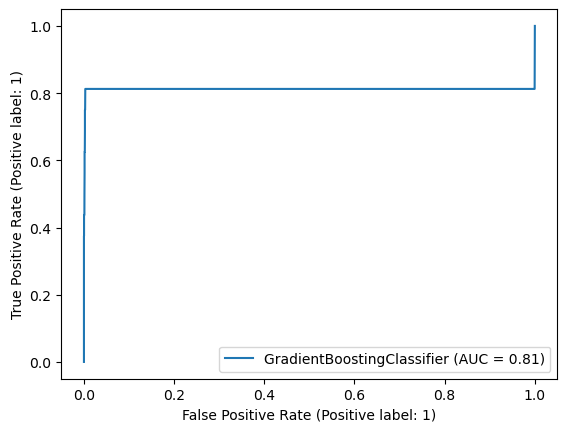

In [120]:
p3=plot_roc_curve(grad3,X3_test, y3_test)

In [103]:
from sklearn.model_selection import train_test_split
X4_train, X4_test, y4_train, y4_test = train_test_split(air_pollution_new1, air_pollution['PM25C4'], test_size=0.20, random_state=42)




In [104]:
grad4=GradientBoostingClassifier(random_state=0)
grad4.fit(X4_train,y4_train)

GradientBoostingClassifier(random_state=0)

In [105]:
grad4.score(X4_test,y4_test)

0.9995783555867884

/Users/wkuuser/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


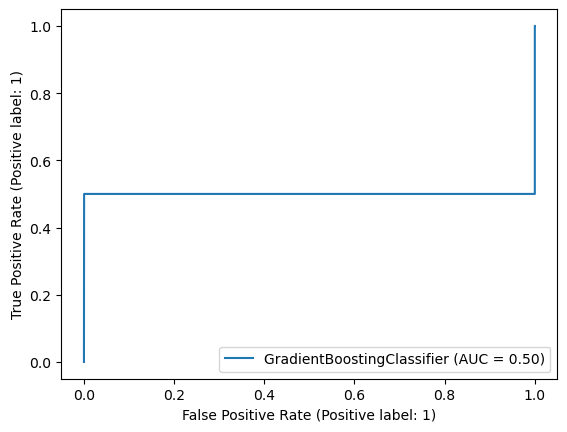

In [106]:
p4=plot_roc_curve(grad4,X4_test, y4_test)

In [107]:
X4_test

,citycode,SO2,PM10,CO,O3_8
27763,330400,3,31,0.6,141
59551,411000,4,40,1.1,81
5011,130600,11,70,0.8,212
41974,341700,20,33,0.4,66
43731,370100,14,96,0.9,196
...,...,...,...,...,...
59316,410900,3,44,0.5,134
49466,371000,2,38,0.3,94
28532,330500,11,97,0.8,122
27193,330300,6,31,0.4,132


In [108]:
from sklearn.model_selection import train_test_split
X5_train, X5_test, y5_train, y5_test = train_test_split(air_pollution_new1, air_pollution['PM25C5'], test_size=0.20, random_state=42)




In [109]:
grad5=GradientBoostingClassifier(random_state=0)
grad5.fit(X5_train,y5_train)

GradientBoostingClassifier(random_state=0)

In [110]:
grad5.score(X5_test,y5_test)

0.9997891777933943

/Users/wkuuser/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


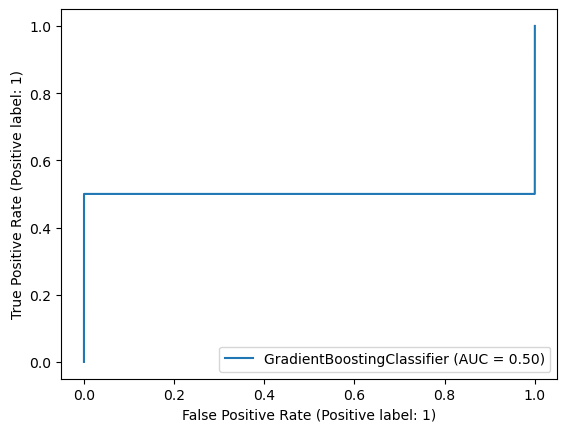

In [111]:
p5=plot_roc_curve(grad5,X5_test, y5_test)

/Users/wkuuser/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/wkuuser/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/wkuuser/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_cur

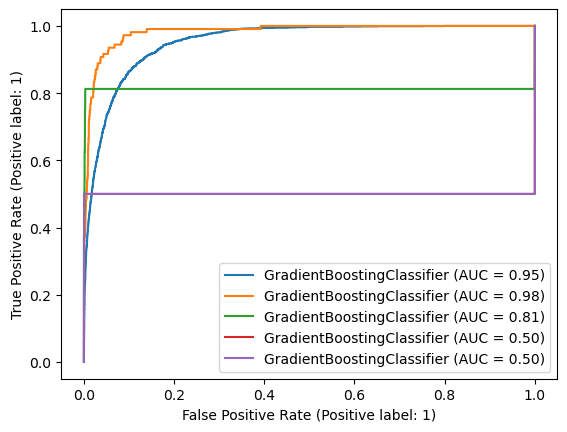

In [112]:
disp=plot_roc_curve(grad1,X1_test, y1_test)
plot_roc_curve(grad2,X2_test, y2_test,ax=disp.ax_);
plot_roc_curve(grad3,X3_test, y3_test,ax=disp.ax_);
plot_roc_curve(grad4,X4_test, y4_test,ax=disp.ax_);
plot_roc_curve(grad5,X5_test, y5_test,ax=disp.ax_); 